In [56]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import scipy.misc
import cv2

In [91]:
def load_pgm_file(file_path):
    with open(file_path, 'rb') as pgm_file:
        pgm_dims = bytearray(pgm_file.readline())
        pgm_dims = pgm_dims.decode('utf-8').split()
        print(pgm_dims)
        width = int(pgm_dims[1])
        height = int(pgm_dims[2])
        max_val = int(pgm_dims[3])
        print(height, width, max_val)
        depth = np.fromfile(pgm_file, dtype=np.uint16, count=height*width)
        depth = depth.reshape((height, width))
        return depth

In [94]:
depth = load_pgm_file('/media/bulk/data/50saladsnew/01-1/depth_pgm/0000000032101218-d.pgm')

['P5', '640', '480', '65535']
640 480 65535


In [107]:
print(depth.shape)
print(depth.dtype)
np.all(np.isfinite(depth))
depth_small = cv2.resize(depth, dsize=(320, 240),interpolation=cv2.INTER_NEAREST)
print(depth_small.shape)

(480, 640)
uint16
(240, 320)


In [100]:
depth_image = scipy.misc.toimage(depth)

/home/sean/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  if __name__ == '__main__':


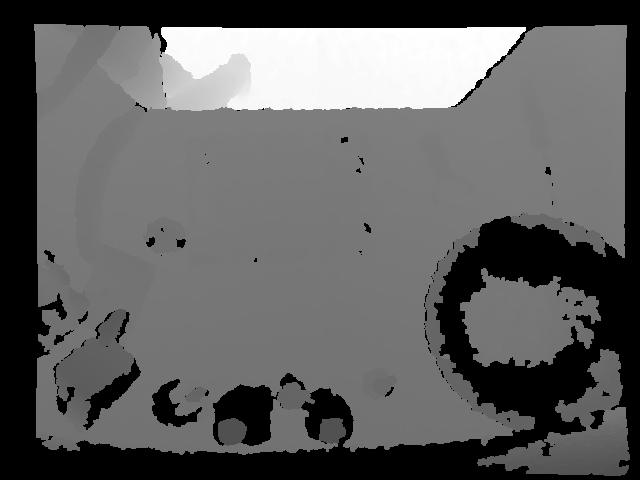

In [101]:
depth_image

(240, 320)

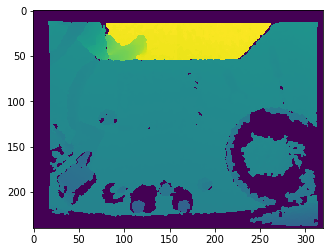

In [108]:
plt.imshow(depth_small)
depth_small.shape

In [88]:
color_image = cv2.imread('/media/bulk/data/50saladsnew/01-1/rgb/0000000032101164.png')

(240, 320, 3)


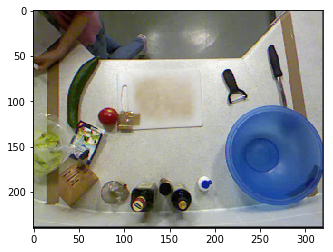

In [89]:
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
plt.imshow(color_image_rgb)
print(color_image_rgb.shape)